# PROJETO MÓDULO III - Data Science Aplicada

***

## Estatística com python para análise de dados

### Importação das libs

In [1]:
import              pandas                 as pd
import              matplotlib.pyplot      as plt
import              seaborn                as sns
import              numpy                  as np

import warnings
warnings.filterwarnings('ignore')

### Importação dos Datasets

In [2]:
df = pd.read_csv('PENSE_AMOSTRA2_ALUNOESCOLA.CSV', sep=';')
df.head(3)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1,1,1,1,1,1,1,3,1,296


In [3]:
# Seleção das colunas
colunas =['VE01P70', 'REGEOGR', 'V0008', 'VB01003', 'VB07004', 'VB07006', 'VB07007', 'VB07008', 'VB07009',
         'VB07010', 'VB12001', 'VB12002', 'VB12003', 'VB11006', 'VB11007', 'VB11001', 'VB11002', 'VB11003',
         'VB11004A', 'VB11005']

In [4]:
# Selecionando somente as colunas que serão utilizadas para análise
df = df[colunas]

In [5]:
colunas = ['politica_contra_bu', 'regiao_geo', 'tipo_escola', 'idade', 'preocupacao_resp', 'amigos_trataram_bem',
          'amigos_trataram_mal', 'motivo_bul', 'praticou_bu', 'ja_sofreu_bul', 'sentido_sozinho',
          'sem_dormir', 'qt_amigos', 'imagem_corporal', 'sentimento_corpo', 'corpo', 'fazendo_corpo', 'remedio_perder_peso',
          'remedio_perder_peso_sem_medico', 'remedio_ganhar_peso']

In [6]:
# Renomeando as colunas
df.columns = colunas

### ENTENDIMENTO DOS DADOS

Nesta seção, será criada uma variável contendo uma tabela com a quantidade de registros em cada uma das colunas.
Esta forma de visualização tem como objetivo entender quais são os dados, analisando o dataset como um todo, poupando tempo e possibilitando um entendimento geral dos dados.

In [7]:
# Contando e agrupando
table = df.apply(pd.Series.value_counts)

# Alterando o tipo de dado para object e os valores nuloes (nan) para a palavra 'None'
table = table.astype(object).replace(np.nan, 'None')

# Substituindo a palavra 'None' para vazio (a fim de facilitar a visualização)
table = table.replace('None', '')

In [8]:
# Visualizando a tabela com a qt. de dados
table

,politica_contra_bu,regiao_geo,tipo_escola,idade,preocupacao_resp,amigos_trataram_bem,amigos_trataram_mal,motivo_bul,praticou_bu,ja_sofreu_bul,sentido_sozinho,sem_dormir,qt_amigos,imagem_corporal,sentimento_corpo,corpo,fazendo_corpo,remedio_perder_peso,remedio_perder_peso_sem_medico,remedio_ganhar_peso
-1,,,,,,,,9250,,,,,,,,,,,,
1,14732,3188,300,,2493,1345,9147,403,2905,7584,5805,5701,642,7102,4608,952,6169,1262,1108,1321
2,1762,3465,9009,,2476,1470,3541,241,13579,8533,3584,4736,988,6604,6920,3261,4688,15107,15243,15007
3,,3276,3072,,3608,3195,2550,705,,387,4580,4149,2056,1969,1807,8822,2674,,,
4,,3207,4175,,2818,4779,670,1110,,,1601,1374,12803,726,2326,2951,2859,,,
5,,3420,,,5070,5677,545,160,,,920,519,,,714,411,,,,
6,,,,,,,,119,,,,,,,,,,,,
7,,,,,,,,4489,,,,,,,,,,,,
9,62,,,,,,,,,,,,,,,,,,,
11,,,,2072,,,,,,,,,,,,,,,,


## POLÍTICA CONTRA BULLYING

***

Em 2016 entrou em vigor a Lei nº 13.185 que classifica o bullying como intimidação sistemática, quando há violência física ou psicológica em atos de humilhação ou discriminação. A classificação também inclui ataques físicos, insultos, ameaças, comentários e apelidos pejorativos, entre outros. 

Fonte: <a href="http://portal.mec.gov.br/component/tags/tag/34487#:~:text=A%20Lei%20n%C2%BA%2013.185%2C%20em,e%20apelidos%20pejorativos%2C%20entre%20outros.">Ministério da Educação</a>


<img src="https://i.ibb.co/TcQGPp3/Captura-de-Tela-2021-01-07-a-s-22-13-32.png" alt="Captura-de-Tela-2021-01-07-a-s-22-13-32" width="540" height="281">


Como analisado abaixo, a maior parte dos alunos responderam afirmativamente a pergunta:

**A escola tem alguma política, norma ou regra escrita que proíba bullying nas suas dependências?**

In [9]:
# Criando e agrupando
q = df['politica_contra_bu'].value_counts()
p = df['politica_contra_bu'].value_counts(normalize = True) * 100

# Criando um DataFrame
t = pd.DataFrame({'Qt' : q, 'Perc' : p})
t 

,Qt,Perc
1,14732,88.982846
2,1762,10.642667
9,62,0.374487


In [10]:
# Selecionando os alunos que responderam 'nao' para política contra bullying e
# calculando a qt. e o percentual por idade

q = df[df['politica_contra_bu'] == 2]['idade'].value_counts()
p = df[df['politica_contra_bu'] == 2]['idade'].value_counts(normalize = True) * 100

#Criando dataframe
t = pd.DataFrame({'Qt' : q, 'Perc' : p}).sort_values(by='Perc', ascending=False)
t 

,Qt,Perc
12,262,14.869467
15,252,14.301930
14,250,14.188422
13,237,13.450624
11,216,12.258797
16,211,11.975028
17,178,10.102157
18,92,5.221339
19,64,3.632236


In [11]:
# Selecionando os alunos que responderam 'sim' para política contra bullying e
# calculando a qt. e o percentual por idade

q = df[df['politica_contra_bu'] == 1]['idade'].value_counts()
p = df[df['politica_contra_bu'] == 1]['idade'].value_counts(normalize = True) * 100

# Criando dataframe
t = pd.DataFrame({'Qt' : q, 'Perc' : p}).sort_values(by='Perc', ascending=False)
t 

,Qt,Perc
12,2372,16.101005
13,2324,15.775183
15,2171,14.736628
16,2041,13.854195
14,1883,12.781700
11,1856,12.598425
17,1322,8.973663
18,466,3.163182
19,297,2.016020


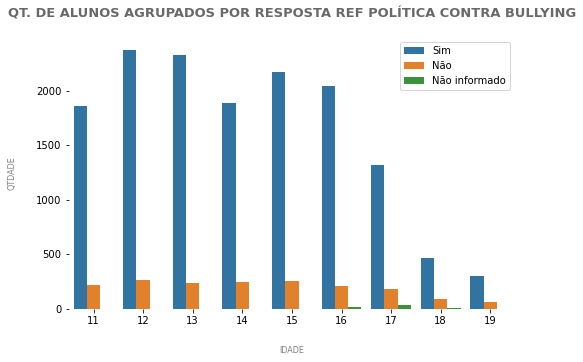

In [12]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(data=df, x='idade' ,hue='politica_contra_bu')

plt.title('QT. DE ALUNOS AGRUPADOS POR RESPOSTA REF POLÍTICA CONTRA BULLYING',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.legend(labels=['Sim', 'Não', 'Não informado'])

Quase 90% dos alunos responderam que existem políticas, regras ou normas que proíbem bullying nas dependências da escola.

A maior quantidade de alunos que não responderam a pergunta se concentra nas maiores idades

Alunos que reponderam "sim" se concentram nos 12, 13, 15 anos, seguido por 16 e 11 anos.

Vale lembrar que se trata de **quantidades**, ou seja, na amostra, pode haver maior quantidade de alunos em determinadas idades, o que, logicamente, altera a visualização do gráfico.

***

***

## MÉDIA, MEDIANA E DESVIO PADRÃO

**MÉDIA**: A média é provavelmente a estatística mais conhecida e utilizada. De forma bastante resumida, concentra a posição média dos valores. É mais indicada quando os números estão distribuidos de maneira mais uniforme, uma vez que são bastante suscetíveis à outliers.

**MEDIANA**: A mediana é o valor que se concentra exatamente no meio do conjunto de dados.

1 . Para realizar o cálculo, caso o conjunto de dados seja ímpar, basta pegar o número que se encontra exatamente no meio.

2 . Caso o conjunto de dados possuir um número par, basta calcular a média dos dois números que estiverem exatamente no meio, conforme exemplo a seguir:

<img class="alignnone wp-image-13633" src="https://blog.professorferretto.com.br/wp-content/uploads/2017/05/calculo-de-mediana-com-sequencia-par.png" alt="Exemplo de cálculo da mediana com sequência de elementos par" width="601" height="293">

Fonte: <a href="https://blog.professorferretto.com.br/moda-media-e-mediana-medidas-de-tendencia-central/."> BLOG DO FERRETTO </a>



**DESVIO PADRÃO** O desvio padrão é bastante utilizado para identificar a variabilidade. Aproximadamente, o desvio padrão será a distância média do centro, que neste caso, centro seria a média.

O desvio padrão da população toda é representado pela letra grega σ. Já o desvio padrão da amostra é representado pela letra S.

<img class="XqHOTb IGEbUc" alt="\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}" src="https://www.gstatic.com/education/formulas2/-1/en/population_standard_deviation.svg" role="img" data-atf="0">

### MOTIVO DO BULLYING

Para exemplificar o conceito de média e mediana, serão analisados os motivos de bullying respondidos pelos alunos

VB07008	NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?
-1	Pulo no questionário
1	A minha cor ou raça
2	A minha religião
3	A aparência do meu rosto
4	A aparência do meu corpo
5	A minha orientação sexual
6	A minha região de origem
7	Outros motivos/causas
99	Não informado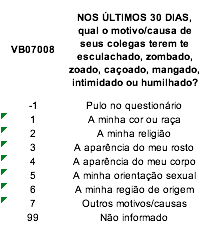

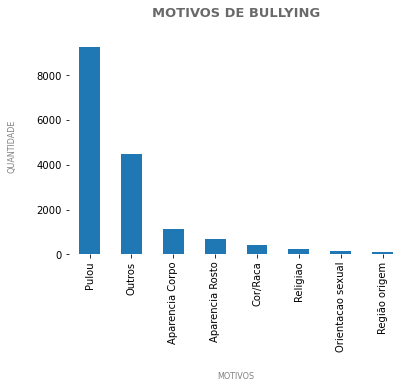

In [13]:
# Copiando o dataframe original (evitar erros)
a = df.copy()

# Criando dicionario com as respostas
rotulos = {-1 : 'Pulou', 1:'Cor/Raca', 2:'Religiao', 3: 'Aparencia Rosto', 4: 'Aparencia Corpo',
          5: 'Orientacao sexual', 6: 'Região origem', 7: 'Outros', 8: 'Não informado'}

# Traduzinho o dicionario
a['motivo_bul'] = a['motivo_bul'].map(rotulos)

# Plotando e configuando o gráfico
ax = (a['motivo_bul'].value_counts()).plot(kind='bar')

ax = plt.title('MOTIVOS DE BULLYING',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('MOTIVOS', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)


A grande maioria dos alunos pulam o motivo de bullying.

A aparencia do corpo e do rosto são os dois principais motivos de bullying que foram possíveis identificar.
 

####  BULLYING POR APARÊNCIA - MÉDIA DE IDADE

In [24]:
# Criando uma variável para filtrar os dados que possuem a palavra 'aparencia' na coluna 'motiv_bul'
b = a['motivo_bul'].str.contains('Aparencia')

# Criando uma coluna na variável 'a' conforme variável 'b'
a['aparencia'] = b

In [56]:
# Média de idade das crianças que sofrem bullying por conta da aparência
media = a[a['aparencia'] == True]['idade'].mean()
media 

13.832506887052341

In [57]:
# Mediana de idade das crianças que sofrem bullying por conta da aparência
mediana = a[a['aparencia'] == True]['idade'].median()
mediana

14.0

In [45]:
a[a['aparencia'] == True]['idade'].std()

1.9863206518330716

## HISTOGRAMA

O histograma é uma forma de visualização 

1 . Caso os dados apresentem valores muito discrepante na parte superior do conjunto de dados, o histograma ficará distorcido para a direita. A média será maior do que a mediana.

2 . Caso os dados apresentem valores muito discrepantes na parte inferior do conjunto de dados, o histograma ficará distorcido para esquerda. A média será menor do que a mediana.

3 . Caso os dados sejam simétricos, representando uma normalidade, a média e a mediana terão aproximadamente o mesmo valor.

<img border="0" data-original-height="386" data-original-width="549" src="https://3.bp.blogspot.com/-ieYxAgEBaxU/WvSQXoLhpqI/AAAAAAAAEeM/3lSn5M_VXYgoWUz6YOGguurvX7DcORkwACEwYBhgL/s1600/assime2.JPG">

Fonte: <a href="http://soniavieira.blogspot.com/2018/05/por-conta-de-umapergunta-sobre-questao_83.html."> Sonia Vieira </a>

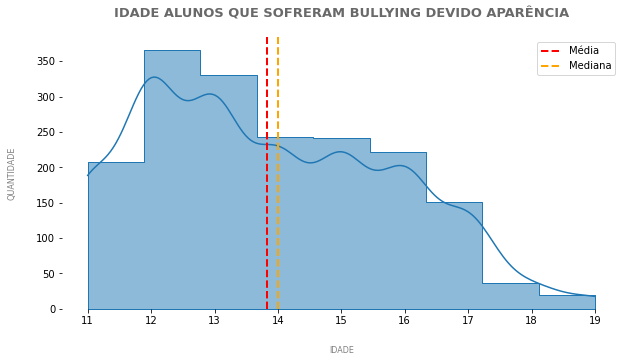

In [55]:
plt.figure(figsize=(10,5))

ax = sns.histplot(a[a['aparencia'] == True]['idade'], bins = 9, kde = True, element="step")

ax = plt.title('IDADE ALUNOS QUE SOFRERAM BULLYING DEVIDO APARÊNCIA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)

plt.axvline(x=media, linewidth=2, color='red', linestyle='--', label ='Média')
plt.axvline(x=mediana, linewidth=2, color='orange', linestyle='--', label ='Mediana')

plt.legend()
ax;

## BOXPLOT

<img alt="Box Plot | Simply Psychology" src="https://www.simplypsychology.org/boxplot.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 435px; height: 223.158px; ">

### SENTIMENTO EM RELAÇÃO AO CORPO